 Simple linear Regression or ordinary least squares
 y = beta0 + beta1*x + epsilon

<Axes: xlabel='DATE'>

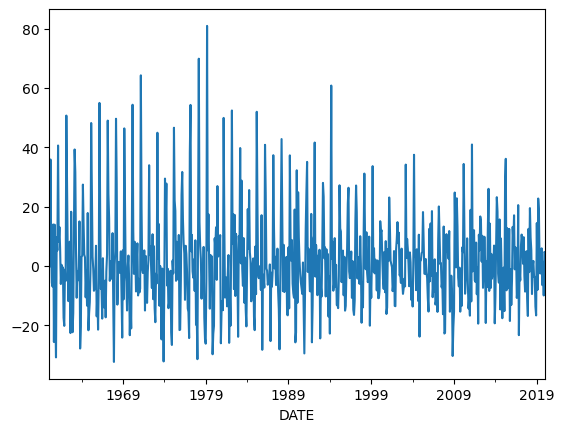

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

data = pdr.get_data_fred('HOUSTNSA', '1960-01-01', '2020-01-01')
housing = 100 * data.HOUSTNSA.pct_change().dropna()
housing.plot()

In [2]:
# Autoregression 
# regression agnaist self


In [3]:
# We'll make a dataframe of shifts, we could do this with a loop, but
# clearly of exposition, we'll draw it out

df = housing.shift(3).to_frame('S3')
df.head()

,S3
DATE,
1960-02-01,NaN
1960-03-01,NaN
1960-04-01,NaN
1960-05-01,5.465116
1960-06-01,-0.220507


In [4]:
df['S2'] = housing.shift(2)
df.head()

,S3,S2
DATE,,
1960-02-01,NaN,NaN
1960-03-01,NaN,NaN
1960-04-01,NaN,5.465116
1960-05-01,5.465116,-0.220507
1960-06-01,-0.220507,35.911602


In [5]:
df["S1"] = housing.shift(1)
df.head()

,S3,S2,S1
DATE,,,
1960-02-01,NaN,NaN,NaN
1960-03-01,NaN,NaN,5.465116
1960-04-01,NaN,5.465116,-0.220507
1960-05-01,5.465116,-0.220507,35.911602
1960-06-01,-0.220507,35.911602,5.853659


In [6]:
# df contains values for past three dates for each given date

X = df.fillna(0).values # should be more careful with NA's
X

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  5.46511628],
       [ 0.        ,  5.46511628, -0.22050717],
       ...,
       [ 5.95446585, -6.44628099,  1.41342756],
       [-6.44628099,  1.41342756, -9.93031359],
       [ 1.41342756, -9.93031359,  4.73887814]])

In [7]:
y = housing.values
y

array([ 5.46511628e+00, -2.20507166e-01,  3.59116022e+01,  5.85365854e+00,
       -5.68356375e+00, -6.92182410e+00,  1.39982502e+01, -2.56331543e+01,
        1.39318885e+01, -1.59420290e+01, -3.08189655e+01,  9.65732087e+00,
        5.25568182e+00,  4.06207827e+01,  8.25335893e+00,  1.31205674e+01,
        5.64263323e+00, -6.08308605e+00,  3.94944708e-01, -1.33752950e+00,
       -4.78468900e-01, -1.74679487e+01, -2.01941748e+01, -1.21654501e+00,
       -5.04926108e+00,  5.07133593e+01,  2.71944923e+01,  5.00676590e+00,
       -1.18556701e+01, -2.19298246e-01,  8.20512821e+00, -2.26134056e+01,
        1.82852143e+01, -1.05769231e+01, -2.23325062e+01, -1.58679446e+01,
        1.34177215e+01,  3.92857143e+01,  3.15705128e+01,  5.17661389e+00,
       -1.07122177e+01, -1.88067445e+00, -4.82485129e+00, -2.08333333e-01,
        1.50313152e+01, -2.78281912e+01, -2.03688181e+01,  3.05263158e+00,
        3.47293156e+00,  2.74432379e+01,  1.39426801e+01,  3.87491502e+00,
        2.87958115e+00, -

In [9]:
# Do regression of X agnaist y
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X, y) # fit it with data

print(lr.coef_, lr.intercept_)

[-0.19388301  0.00446206  0.18881554] 1.2015227998832667


In [11]:
# Use autoregression model from stats model
from statsmodels.tsa.ar_model import AutoReg
# knowing the autoregression/math helps in locating function in libraries

mod = AutoReg(housing,3) # 3 number of lags
res = mod.fit()

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  720
Model:                     AutoReg(3)   Log Likelihood               -2972.062
Method:               Conditional MLE   S.D. of innovations             15.275
Date:                Thu, 13 Apr 2023   AIC                           5954.124
Time:                        20:39:49   BIC                           5976.999
Sample:                    05-01-1960   HQIC                          5962.956
                         - 01-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1506      0.574      2.003      0.045       0.025       2.276
HOUSTNSA.L1     0.1894      0.037      5.187      0.000       0.118       0.261
HOUSTNSA.L2     0.0035      0.037      0.093    

C:\Users\kamal\anaconda3\anaconda-py\envs\data-science\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
